# Create Mandelbrot Dataset

In this notebook we will build and create the Mandelbrot dataset that will be later used as input to train our model. The idea is to create a dataset of points in the x-y coordinates where we identify if the point is part of the Mandelbrot set or not. The dataset will be used to train a model that can predict if a point is in the Mandelbrot set.

## 🛠️ Supported Hardware

✅ AMD EPYC™ Processors  
✅ AMD Ryzen™ (AI) Processors  

Suggested hardware: **AI PC powered by AMD Ryzen™ AI Processors**

## ⚡ Recommended Software Environment

::::{tab-set}

:::{tab-item} Linux
- [Install Docker container](https://amdresearch.github.io/aup-ai-tutorials//env/env-gpu.html)
- [Install PyTorch](https://amdresearch.github.io/aup-ai-tutorials//env/env-cpu.html)
:::

:::{tab-item} Windows
- [Install Direct-ML](https://amdresearch.github.io/aup-ai-tutorials//env/env-gpu-windows.html)
- [Install PyTorch](https://amdresearch.github.io/aup-ai-tutorials//env/env-cpu.html)
:::
::::

## 🎯 Goals

- Create a Mandelbrot dataset

:::{seealso}
- [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)
:::

Import the necessary libraries and set the parameters for the Mandelbrot set generation.

In [1]:
import colorsys
import matplotlib.pyplot as plt
import numpy as np
import cv2

Define the width of the set in number of pixels, we will start with 200. We assume that the aspect ratio is one.

In [2]:
height = width = 200

Compute the mandelbrot set

In [3]:
x = -0.65
y = 0
y_range = x_range = 3.4
precision = 500

min_x = x - x_range / 2
max_y = y + y_range / 2

img = np.zeros((height, width, 3), dtype=np.float32) # define image

def power_color(distance, exp, const, scale):
    color = distance**exp
    rgb = colorsys.hsv_to_rgb(const + scale * color,1 - 0.6 * color,0.9)
    return tuple(round(i * 255) for i in rgb)

for row in range(height):
    for col in range(width):
        x = min_x + col * x_range / width
        y = max_y - row * y_range / height
        old_x = x
        old_y = y
        for i in range(precision + 1):
            a = x*x - y*y
            b = 2 * x * y
            x = a + old_x
            y = b + old_y
            if x*x + y*y > 4:
                break
        if i < precision:
            distance = (i + 1) / (precision + 1)
            rgb = power_color(distance, 0.2, 0.27, 1.0)
            img[row, col] = rgb
        index = row * width + col + 1
img /= 255 # convert to float

Apply a few transformations to clean up the dataset, make it binary a point belongs or not to the set.

In [ ]:
gray_image = 1.0 - cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, mandelbrot_golden = cv2.threshold(gray_image, 0.91, 1, cv2.THRESH_BINARY)

Visualize the Mandelbrot set

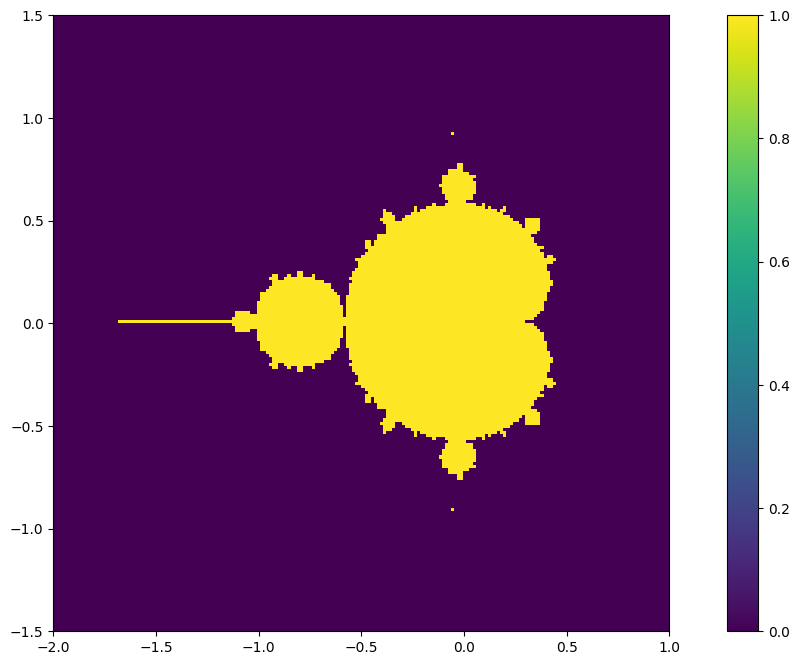

In [ ]:
x_values = np.linspace(-2, 1, mandelbrot_golden.shape[1])
y_values = np.linspace(-1.5, 1.5, mandelbrot_golden.shape[0])
x_coords, y_coords = np.meshgrid(x_values, y_values)

plt.figure(figsize=(15, 8))

plt.imshow(mandelbrot_golden, extent=(x_values[0], x_values[-1], y_values[0], y_values[-1]), origin='lower', vmin=0, vmax=1)

plt.colorbar()
plt.show()

Save the model to a file for later use.

In [ ]:
def save_manderlbrot(img):
    name = f'datasets/mandelbrot/mandelbrot-set_{mandelbrot_golden.shape[1]}_{mandelbrot_golden.shape[0]}.npy'
    np.save(name, img)
save_manderlbrot(mandelbrot_golden)

----------
Copyright (C) 2025 Advanced Micro Devices, Inc. All rights reserved.

SPDX-License-Identifier: MIT